In [4]:
import os

import numpy as np
import pandas as pd
import tensorflow as tf

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

path_root = "/data/datasets/simulation_data/frames"

In [5]:
# +selected pirticle
import random

# 密度，需要进行采样，但这里对所有的粒子进行了求解
f = open("feature_vectors.csv","w+") 
f_labels = open("feature_vectors_labels.csv","w+") 
number_particles = len(frame_particle)
for i in range(number_particles):
    f.writelines(str(i))
    f.writelines(",")
    for num in range(100):
        theta = random.random()
        for j in range(number_particles):
            if i == j:
                continue

            if j == number_particles-1:
                j = number_particles-100

            if j == i+1:
                # 表面张力
                delta_px = theta*(float(frame_particle[i,0]) - float(frame_particle[j,0]))
                delta_py = theta*(float(frame_particle[i,1]) - float(frame_particle[j,1]))
                delta_pz = theta*(float(frame_particle[i,2])- float(frame_particle[j,2]))

                # 粘性力
                delta_vx = theta*(float(frame_particle[i,0]) - float(frame_particle[j,0]))
                delta_vy = theta*(float(frame_particle[i,1]) - float(frame_particle[j,1]))
                delta_vz = theta*(float(frame_particle[i,2]) - float(frame_particle[j,2]))

                #密度
                density = theta*(delta_px + delta_py + delta_pz)

                # 压强力
                px = theta*(density*delta_px)
                py = theta*(density*delta_py)
                pz = theta*(density*delta_pz)

                all_props = [delta_px, delta_py, delta_pz, delta_vx, delta_vy, delta_vz, density, px, py, pz]
                all_props = ",".join(list(map(str,all_props)))

        f.writelines(all_props)
        f.writelines(',')
        f.flush()
    f.writelines('\n')
#     f_labels.write(",".join(list(map(str,[i,frame_particle[i,9], frame_particle[i,10], frame_particle[i,11]]))))
f.close()
# f_labels

NameError: name 'frame_particle' is not defined

In [7]:
# for i in range(0,2000,100):
#     file_path = os.path.join(data_dir_path, "particles_%d.csv"%i)
#     frame_particle = np.loadtxt(file_path, dtype=np.str, delimiter=",")
#     plot_3d_scater(frame_particle)


# for i in range(0,20000,1000):
#     file_path = os.path.join(data_dir_path, "particles_%d.csv"%i)
#     frame_particle = np.loadtxt(file_path, dtype=np.str, delimiter=",")
#     print("min:", min(frame_particle[:,0]), min(frame_particle[:,1]), min(frame_particle[:,2]),\
#          "max:", max(frame_particle[:,0]), max(frame_particle[:,1]), max(frame_particle[:,2]))

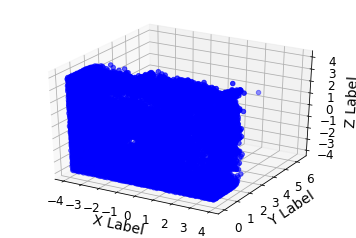

In [11]:
"""
plot figure
"""
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def plot_3d():
    X = np.arange(-5, 5, 0.25)
    Y = np.arange(-5, 5, 0.25)
    X, Y = np.meshgrid(X, Y)
    R = np.sqrt(X**2 + Y**2)
    Z = np.sin(R)
    
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis)
    
    plt.show()

def plot_3d_scater(frame_particle):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    x = list(map(float,frame_particle[1:,0]))
    y = list(map(float,frame_particle[1:,1]))
    z = list(map(float,frame_particle[1:,2]))
    ax.scatter(x, y, z, c="b", marker='o')

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    plt.show()

particle_path_2000 = os.path.join(path_root, "fluid_particles_2000.csv")
file_path = particle_path_2000
frame_particle_2000 = np.loadtxt(file_path, dtype=np.str, delimiter=",")   
plot_3d_scater(frame_particle_2000)


In [13]:
"""
100 methods for data preprocess
"""
#frame_particle = pd.read_csv(file_path)
frame_particle = np.loadtxt(file_path, dtype=np.str, delimiter=",")
print(frame_particle.shape)
# 数据表头
"""
'position_x', 'position_y', 'position_z', 'velocity_x',
' velocity_y', 'velocity_z', 'timestep', 'isFluidSolid', 'source',
'out_position_x', 'out_position_y', 'out_position_z',
'out_velocity_x', ' out_velocity_y', 'out_velocity_z',
'acceleration_x', 'acceleration_y', 'acceleration_z'
"""
frame_particle_2000[0,-4:-1]

(33635, 19)


array(['acceleration_x', 'acceleration_y', 'acceleration_z'],
      dtype='<U15')

In [14]:
allfiles = os.listdir(path_root)
file_names = []
for file_name in allfiles:
    if file_name.endswith(".csv"):
        file_names.append(file_name)

for filename in file_names:
    if filename.find("2000") > -1:
        # todo
        "先对某一帧进行处理"
        file_path = os.path.join(path_root, filename)
        frame_particle = np.loadtxt(file_path, dtype=np.str, delimiter=",")
        print(frame_particle[1,:-1])
        propertities = frame_particle[1:,0:8]
        acc = frame_particle[1:, -4:-1]


['-3.82815' '1.28601' '-3.76395' '0.0876288' '3.38591' '-0.321719'
 '0.00115988' '0' '0' '-3.82805' '1.28991' '-3.76432' '0.087473' '3.3603'
 '-0.324974' '-0.134277' '-22.0767' '-2.80625']


In [16]:
"""
mnist
"""
# from tensorflow.examples.tutorials.mnist import input_data
# # mnist = input_data.read_data_sets("/tmp/data")
# mnist = input_data.read_data_sets("/Users/changxin/Documents/UnityPK/datasets/MNIST")
# 
# training_num = mnist.train.num_examples
# training_rate = 0.8
# training_size = int(training_num * training_rate)
# 
# X_train = mnist.train.images
# X_test = mnist.test.images
# y_train = mnist.train.labels
# y_test = mnist.test.labels

"""
particle
"""
training_num = propertities.shape[0]
training_rate = 0.8
training_size = int(training_num * training_rate)

X_train = propertities[:training_size]
X_test = propertities[training_size:]
y_train = acc[:training_size]
y_test = acc[training_size:]

In [20]:
acc.shape

(33634, 3)

In [12]:
from importlib import reload


In [13]:
# from DeepLearning import experiment
# reload(experiment)
# experiment.net_structure(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [32]:
from tensorflow.contrib.layers import fully_connected

n_inputs = X_train.shape[1]
n_outputs = 1

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
reset_graph()



from datetime import datetime

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)

graph = tf.Graph()
with graph.as_default():
    he_init = tf.contrib.layers.variance_scaling_initializer()
    X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
    y = tf.placeholder(tf.float32, shape=(None), name="y")
    
    def dnn(inputs, n_hidden_layers=1, n_neurons=8, name=None, activation=tf.nn.elu, initializer=he_init):
        with tf.name_scope("dnn"):
            for layer in range(n_hidden_layers):
                inputs = tf.layers.dense(inputs, n_neurons, activation=activation, \
                                         kernel_initializer=initializer, name="hidden%d" % (layer + 1))
        return inputs
    
    dnn_outputs = dnn(X)
    logits = fully_connected(dnn_outputs, n_outputs, scope="outputs", activation_fn=None)

    """
    对于损失函数的定义尚有疑虑，再行考虑,目前姑且先使用均方差吧
    """
    with tf.name_scope("train"):
        loss = tf.reduce_mean(tf.square(logits-y))
        optimizer = tf.train.AdamOptimizer()
        training_op = optimizer.minimize(loss)
    """
    添加summary，以调用tensorboard进行检测
    """


    logdir = log_dir("fluids")
    with tf.name_scope("summary"):
        loss_summary = tf.summary.scalar("log_loss", loss)
        file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())
        var = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()
print("Build graph end.")
n_epochs = 1000
batch_size = 3000

# needed in case of early stopping
max_checks_without_progress = 20
checks_without_progress = 0
best_loss = np.infty
best_params = None

checkpoint_path = "/tmp/my_fluid_model.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "./my_fluid_model"

# X_train = ""
# y_train = ""
# X_valid = ""
# y_valid = ""
# X_test = ""
# y_test = ""


session = tf.Session(graph=graph)

with session.as_default() as sess:
    sess.run(init)
    X_batch, y_batch = X_train[0:batch_size], y_train[0:batch_size]
    # X_batch, y_batch = mnist.train.next_batch(batch_size)
    sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
    loss_train, logits, var= sess.run([loss, logits, var], feed_dict={X: X_test, y: y_test})
    print(loss_train, logits)
    print("{}\tLast training batch loss: {:.6f}".format(1, loss_train))




'\n    对于损失函数的定义尚有疑虑，再行考虑,目前姑且先使用均方差吧\n    '

'\n    添加summary，以调用tensorboard进行检测\n    '

Build graph end.
inf [[  1.54632328e+33]
 [  1.54632328e+33]
 [  1.54632328e+33]
 ..., 
 [  1.54632328e+33]
 [  1.54632328e+33]
 [  1.54632328e+33]]
1	Last training batch loss: inf


In [31]:
X_train[0:batch_size]

array([['-3.82815', '1.28601', '-3.76395', ..., '-0.321719', '0.00115988',
        '0'],
       ['-3.74811', '1.24472', '-3.8219', ..., '-0.196457', '0.00115988',
        '0'],
       ['-2.74872', '1.08544', '-3.01274', ..., '3.35758', '0.00115988',
        '0'],
       ..., 
       ['2.32805', '0.0797056', '-2.97639', ..., '-2.87686', '0.00115988',
        '0'],
       ['0.533605', '0.0563533', '-0.958011', ..., '-0.57395',
        '0.00115988', '0'],
       ['3.78367', '0.084135', '-2.60465', ..., '-2.58379', '0.00115988',
        '0']],
      dtype='<U15')